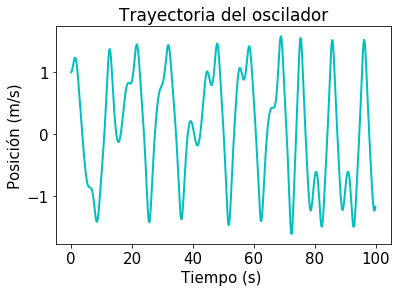

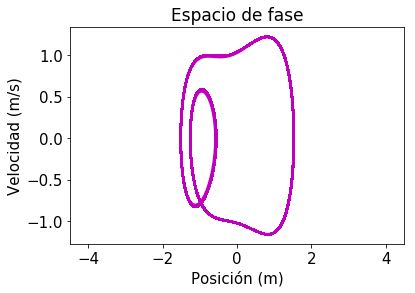

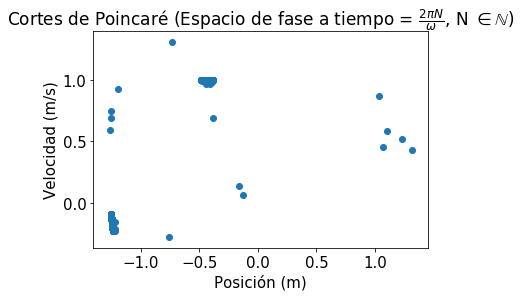

In [57]:
# Este código simula el movimiento del oscilador de Duffing:
# Un oscilador forzado y amortiguado en un potencial de doble pozo.
# d^2x/dt^2 = - delta*dx/dt - alpha*x - beta*x^3 + gamma*cos( omega*t )
# Se resuelve la ecuación diferencial no lineal de segundo orden numéricamente usando expansión de Taylor.

# El movimiento que se presenta es caótico, es decir, es altamente sensible a las condiciones iniciales.
# Adicionalmente, no se observa un periodo fijo de movimiento. Las secciones de Poincaré son fractales.

import numpy as np
import matplotlib.pyplot as plt
import time

#Variable para medir la duración del cálculo
#t1 = time.time() 

# Parámetros (Masa = 1 kg)
alpha = -1.0
beta = 1.0
omega = 1.2
delta = 0.3
#gamma es variable desde 0.2 a 0.65
# 0.2, 0.28, 0.29, 0.37, 0.5, 0.65
gamma = 0.65

a = -0.5*alpha
b = 0.25*beta

#Ancho de paso
h = 1e-1
periodo = 2*np.pi/(omega)

# Duración de la simulación
T = 30000
t = np.arange(0,T,h)

def x_2(x,v):
    '''
    Termino de la segunda derivada en la 
    serie de Taylor
    '''
    return -delta*v + 2.0*a*x - 4.0*b*x**3

def x_3(x2,x,v):
    '''
    Termino de la tercer derivada en la 
    serie de Taylor
    '''
    return -delta*x2 + 2.0*a*v -12.0*b*(x**2)*v

def x_4(x3,x2,x,v):
    '''
    Termino de la cuarta derivada en la 
    serie de Taylor
    '''
    return -delta*x3 + 2.0*a*x2 -12.0*b*(x**2)*x2 - 24.0*b*(v**2)*x

def x_5(x4,x3,x2,x,v):
    '''
    Termino de la quinta derivada en la 
    serie de Taylor
    '''
    return -delta*x4 + 2*a*x3 -12.0*b*((x**2)*x3 + 2.0*x2*x*v) -24.0*b*((v**3)+2*x*v*x2)

# Términos trigonométricos en las derivadas.
# Evaluar antes del ciclo (loop)
x2F = gamma*np.cos(omega*t)
x3F = -gamma*omega*np.sin(omega*t)
x4F = -gamma*(omega**2)*np.cos(omega*t)
x5F = gamma*(omega**3)*np.sin(omega*t)

# Coeficientes de la expansión en serie de Taylor
# Evaluar antes del ciclo (loop)
coef1 = 0.5*h**2.0
coef2 = (1.0/6.0)*h**3.0
coef3 = (1.0/24.0)*h**4.0
coef4 = (1.0/120.0)*h**5.0

# Condiciones iniciales
v = 0.0
x = 1.0

posicion = np.zeros(len(t))
velocidad = np.zeros(len(t))
posicion[0] = x

for i in range( 1, len(t) ):
    d2 = x_2(x,v) + x2F[i]
    d3 = x_3(d2,x,v) + x3F[i]
    d4 = x_4(d3,d2,x,v) + x4F[i]
    d5 = x_5(d4,d3,d2,x,v) + x5F[i]
    # Expansión en serie de Taylor para x,v de 5to orden en h
    x += v*h + coef1*d2 + coef2*d3 + coef3*d4 + coef4*d5
    v += d2*h + coef1*d3 + coef2*d4 + coef3*d5
    posicion[i] = x
    velocidad[i] = v

##f = open('data_duffing_pos_vel.txt','w')
##for i in range(len(t)):
##    f.write('%f %f' %(position[i], velocity[i]))
##f.close()

# Se obtienen puntos en el espacio fase a múltiplos enteros del periodo para los Cortes de Poincaré
strange_attractor = np.zeros( [int(T/periodo), 2] )
k = 1
for i in range( len(t) ):
    if abs( t[i]-k*periodo )<h:
        strange_attractor[k-1,0] = posicion[i]
        strange_attractor[k-1,1] = velocidad[i]
        k+=1

#t2 = time.time()
#print( 'Los cálculos computacionales toman ',t2-t1,' segundoss.' )

#Gráficas

#Serie de tiempo
plt.figure(1)
plt.plot( t[:1000], posicion[:1000], 'g-', linewidth=2.0 , color='c' )
plt.title( 'Trayectoria del oscilador', {'fontsize':17} )
plt.xlabel( 'Tiempo (s) ', {'fontsize':15} )
plt.ylabel( 'Posición (m/s)', {'fontsize':15} )
plt.tick_params( axis='both', labelsize=15 )
#plt.savefig("posicion_gamma-0,65.png")

#Espacio de fase
plt.figure(2)
plt.plot( posicion[1000:], velocidad[1000:], 'r-', linewidth=2.0, color='m' )
plt.title( 'Espacio de fase', {'fontsize':17} )
plt.xlim( [-4.5,4.5] )
plt.xlabel( 'Posición (m)', {'fontsize':15} )
plt.ylabel( 'Velocidad (m/s)', {'fontsize':15} )
plt.tick_params( axis='both', labelsize=15 )
#plt.savefig("espacio_fase_gamma-0,65.png")

#Cortes de Poincaré
plt.figure(3)
plt.scatter( strange_attractor[:,0], strange_attractor[:,1] )
plt.title( r'Cortes de Poincaré (Espacio de fase a tiempo = $\frac{2\pi N}{\omega}$, N $\in \mathbb{N}$)', {'fontsize':17} )
plt.xlabel( 'Posición (m)',{'fontsize':15})
plt.ylabel( 'Velocidad (m/s)', {'fontsize':15} )
plt.tick_params( axis='both', labelsize=15)

#plt.savefig("duffing.png")

plt.show((1,2,3))